In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('movies_prepr_featureExt.csv',sep=r',', skipinitialspace=True)
df.head(20)

,title,genres,original_language,popularity,production_companies,release_year,runtime,vote_average,vote_count,pc_impact,pcif,gif,pop_actor,success_pot
0,Meg 2: The Trench,Action,en,4.5,warner bros,2023,3.037037,7.079,4.417647,1.688612,high,high,True,1
1,The Pope's Exorcist,Horror,en,4.5,screen gems,2023,2.074074,7.433,1.763823,0.644241,low,high,True,1
2,Transformers: Rise of the Beasts,Action,en,4.5,paramount,2023,3.851852,7.340,3.259026,1.516934,high,high,True,1
3,Ant-Man and the Wasp: Quantumania,Action,en,4.5,marvel,2023,3.703704,6.507,9.097441,5.512888,very high,high,True,1
4,Creed III,Drama,en,4.5,metro-goldwyn-mayer,2023,3.037037,7.262,3.653864,1.023453,medium,high,True,1
5,Fast X,Action,en,4.5,universal,2023,4.962963,7.275,10.000000,1.566698,high,high,True,1
6,Insidious: The Red Door,Horror,en,4.5,blumhouse,2023,2.370370,6.750,1.825314,0.452118,low,high,True,1
7,Plane,Action,en,4.5,di bonaventura,2023,2.370370,6.901,2.540552,2.337533,high,high,True,1
8,Spider-Man: Across the Spider-Verse,multiple,en,4.5,columbia,2023,4.814815,8.640,5.450050,1.650344,high,low,True,1
9,Aquaman and the Lost Kingdom,Action,en,4.5,warner bros,2023,3.629630,6.786,2.446697,1.688612,high,high,True,1


In [3]:
df['success_pot'].value_counts()

success_pot
0    6773
1    4417
Name: count, dtype: int64

**<h2>Encoding categorical features</h2>**

In [4]:
from sklearn.preprocessing import LabelEncoder
felabel = ['genres','original_language','production_companies']
le = LabelEncoder()
for feature in felabel:
    df[feature] = le.fit_transform(df[feature])

In [5]:
from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal encoding mappings
pcif_mapping = ['low', 'medium', 'high', 'very high']
gif_mapping = ['low', 'medium', 'high']
# Create the OrdinalEncoder and fit-transform the data
ordinal_encoder = OrdinalEncoder(categories=[pcif_mapping, gif_mapping])
X_ordinal = ordinal_encoder.fit_transform(df[['pcif','gif']])

# Update the original DataFrame with the encoded values
df['pcif'] = X_ordinal[:, 0]
df['gif'] = X_ordinal[:, 1]

In [6]:
from sklearn.preprocessing import LabelBinarizer

binary_encoder = LabelBinarizer()
df['pop_actor'] = binary_encoder.fit_transform(df['pop_actor'])

**<h2>Feature Selection</h2>**

<i>Before calculating feature selection parameters, we filter out certain features like 'title' and 'release year' which do not hold much significance as well as 'production_companies' which owing to its high cardinality which has been enconded, results in a bias in feature selection.<i>

<h3>1. Information Gain</h3>

In [7]:
#Calculating information Gain
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming 'target' is your target column
X = df.drop(['success_pot', 'title','production_companies','release_year'], axis=1)
y = df['success_pot']

Feature: vote_count Score: 0.15137807518130497
Feature: popularity Score: 0.12351947057280199
Feature: pc_impact Score: 0.0982193907023916
Feature: vote_average Score: 0.08787509065299659
Feature: pcif Score: 0.06264126574834172
Feature: runtime Score: 0.05811407906751498
Feature: original_language Score: 0.03959883805423203
Feature: pop_actor Score: 0.03387552177807596
Feature: genres Score: 0.01227462321000683
Feature: gif Score: 0.0027183885892272386


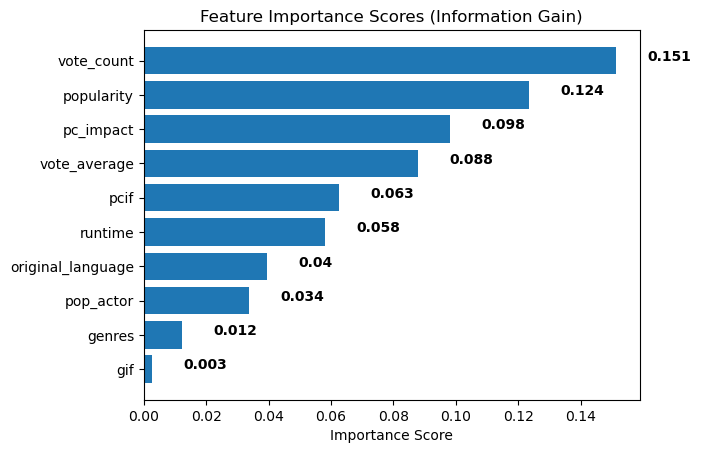

In [8]:
# Apply Information Gain
ig = mutual_info_regression(X, y)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(X.shape[1]):
    feature_scores[X.columns[i]] = ig[i]

# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()


<h3>2. Chi-square test</h3>

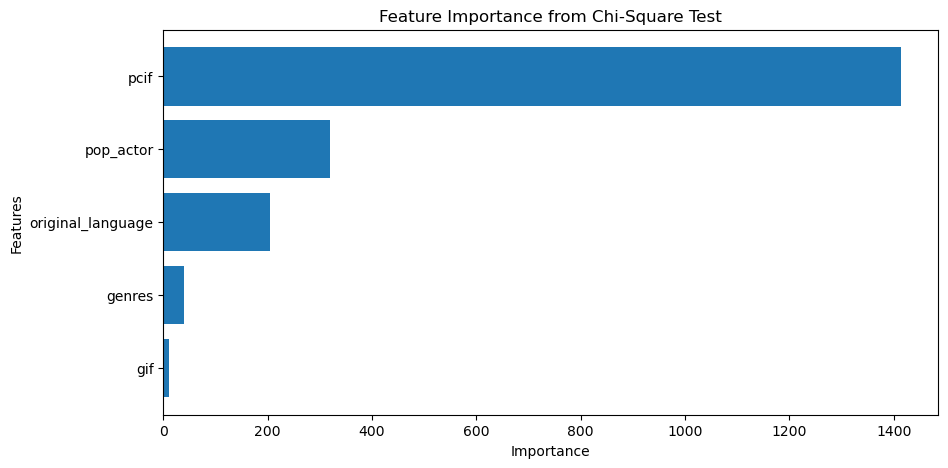

In [9]:
from sklearn.feature_selection import SelectKBest, chi2

# Assume X_encoded contains your one-hot encoded features and y is the target variable
X1 = df.drop(['success_pot', 'title','vote_count','popularity','pc_impact','vote_average','runtime','release_year','production_companies'], axis=1)
# Apply Chi-Square Test
chi2_scores, p_values = chi2(X1, y)

# Create a DataFrame of feature importance scores
feature_scores = pd.DataFrame({'feature': X1.columns, 'score': chi2_scores})

# Sort the DataFrame by scores in descending order
feature_scores = feature_scores.sort_values('score', ascending=False)

# Plot the scores
plt.figure(figsize=(10, 5))
plt.barh(feature_scores['feature'], feature_scores['score'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Chi-Square Test')
plt.gca().invert_yaxis()
plt.show()

<h3>3. Fisher's score</h3>

/var/folders/_8/n7gm5dlx7tn_vjtzky_5rjjr0000gn/T/ipykernel_86744/3706969560.py:9: RuntimeWarning: divide by zero encountered in log10
  fisher_scores = -np.log10(selector.pvalues_)


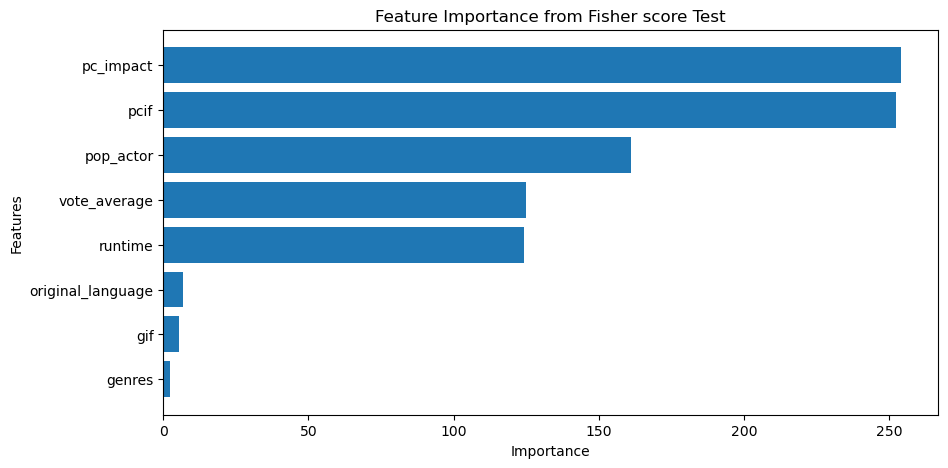

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Apply Fisher Score
selector = SelectKBest(score_func=f_classif, k='all')
fit = selector.fit(X, y)

# Get the scores
fisher_scores = -np.log10(selector.pvalues_)

# Create a DataFrame of feature importance scores
feature_scores = pd.DataFrame({'feature': X.columns, 'score': fisher_scores})

# Sort the DataFrame by scores in descending order
feature_scores = feature_scores.sort_values('score', ascending=False)
# Plot the scores
plt.figure(figsize=(10, 5))
plt.barh(feature_scores['feature'], feature_scores['score'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Fisher score Test')
plt.gca().invert_yaxis()
plt.show()

<h3>Trying Wrapper Feature Selection Methods</h3>

In [11]:
# from sklearn.tree import DecisionTreeClassifier
# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS


# dt = DecisionTreeClassifier(random_state=42)

# efs1 = EFS(dt, 
#            min_features=1,
#            max_features=X.shape[1],
#            scoring='accuracy',
#            print_progress=True,
#            cv=5)

# efs1 = efs1.fit(X, y)

# print('Best accuracy score: %.2f' % efs1.best_score_)
# print('Best subset (indices):', efs1.best_idx_)
# print('Best subset (corresponding names):', efs1.best_feature_names_)


Best accuracy score: 0.20
Best subset (indices): (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Best subset (corresponding names): ('genres', 'original_language', 'popularity', 'runtime', 'vote_average', 'vote_count', 'pc_impact', 'pcif', 'gif', 'pop_actor')


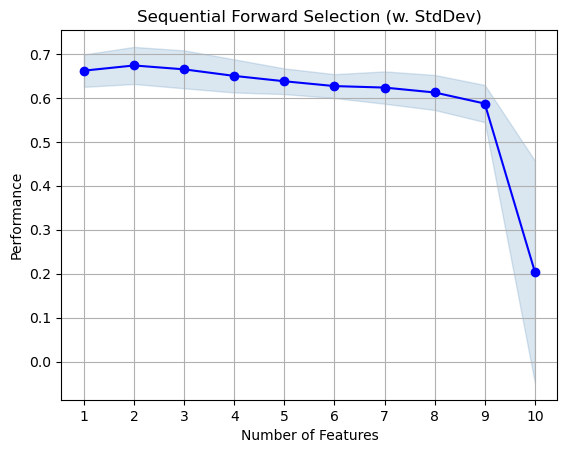

In [12]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


dt = DecisionTreeClassifier(random_state=42)

sfs = SFS(dt, 
           k_features=X.shape[1], 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

sfs = sfs.fit(X, y)

print('Best accuracy score: %.2f' % sfs.k_score_)
print('Best subset (indices):', sfs.k_feature_idx_)
print('Best subset (corresponding names):', sfs.k_feature_names_)

# Plotting the results
fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


Best accuracy score: 0.66
Best subset (indices): (7,)
Best subset (corresponding names): ('pcif',)


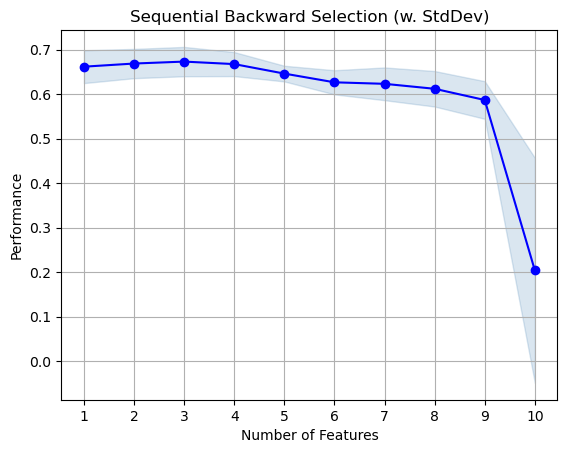

In [13]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


dt = DecisionTreeClassifier(random_state=42)

sfs = SFS(dt, 
           k_features=1, 
           forward=False, 
           floating=False, 
           scoring='accuracy',
           cv=5)

sfs = sfs.fit(X, y)

print('Best accuracy score: %.2f' % sfs.k_score_)
print('Best subset (indices):', sfs.k_feature_idx_)
print('Best subset (corresponding names):', sfs.k_feature_names_)

# Plotting the results
fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()


Best accuracy score: 0.67
Best subset (indices): (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Best subset (corresponding names): ('genres', 'original_language', 'popularity', 'runtime', 'vote_average', 'vote_count', 'pc_impact', 'pcif', 'gif', 'pop_actor')


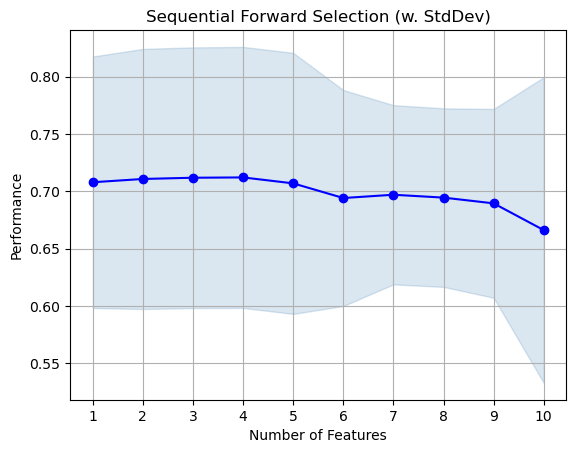

In [14]:
from sklearn.naive_bayes import GaussianNB
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs



gnb = GaussianNB()

sfs = SFS(gnb, 
           k_features=X.shape[1], 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

sfs = sfs.fit(X, y)

print('Best accuracy score: %.2f' % sfs.k_score_)
print('Best subset (indices):', sfs.k_feature_idx_)
print('Best subset (corresponding names):', sfs.k_feature_names_)

# Plotting the results
fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


Best accuracy score: 0.63
Best subset (indices): (0, 3, 4, 6, 7, 8, 9)
Best subset (corresponding names): ('genres', 'runtime', 'vote_average', 'pc_impact', 'pcif', 'gif', 'pop_actor')


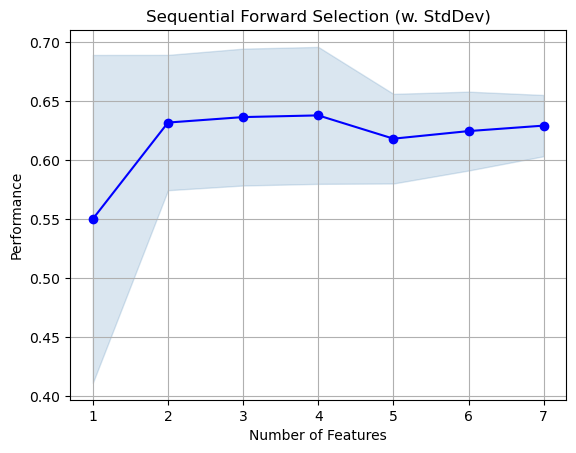

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

knn = KNeighborsClassifier(n_neighbors=3)

sfs = SFS(knn, 
           k_features=7, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

sfs = sfs.fit(X, y)

print('Best accuracy score: %.2f' % sfs.k_score_)
print('Best subset (indices):', sfs.k_feature_idx_)
print('Best subset (corresponding names):', sfs.k_feature_names_)

# Plotting the results
fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


<seperator/>
**<h2>Random Forest</h2>**

In [16]:
import seaborn as sns

In [18]:
# Putting feature variable to X
X_m = df.drop(['success_pot', 'title','production_companies','release_year'], axis=1)
# Putting response variable to y
y_m = df['success_pot']

In [19]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_m, y_m, train_size=0.85, random_state=42)
X_train.shape, X_test.shape

((9511, 10), (1679, 10))

In [20]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [21]:
# checking the oob score
classifier_rf.oob_score_

0.7481863105877405

In [22]:
#Hyperparameter Tuning using Grid Search

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,7],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 7],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [23]:
grid_search.best_score_

0.7574390456197658

In [24]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=7, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

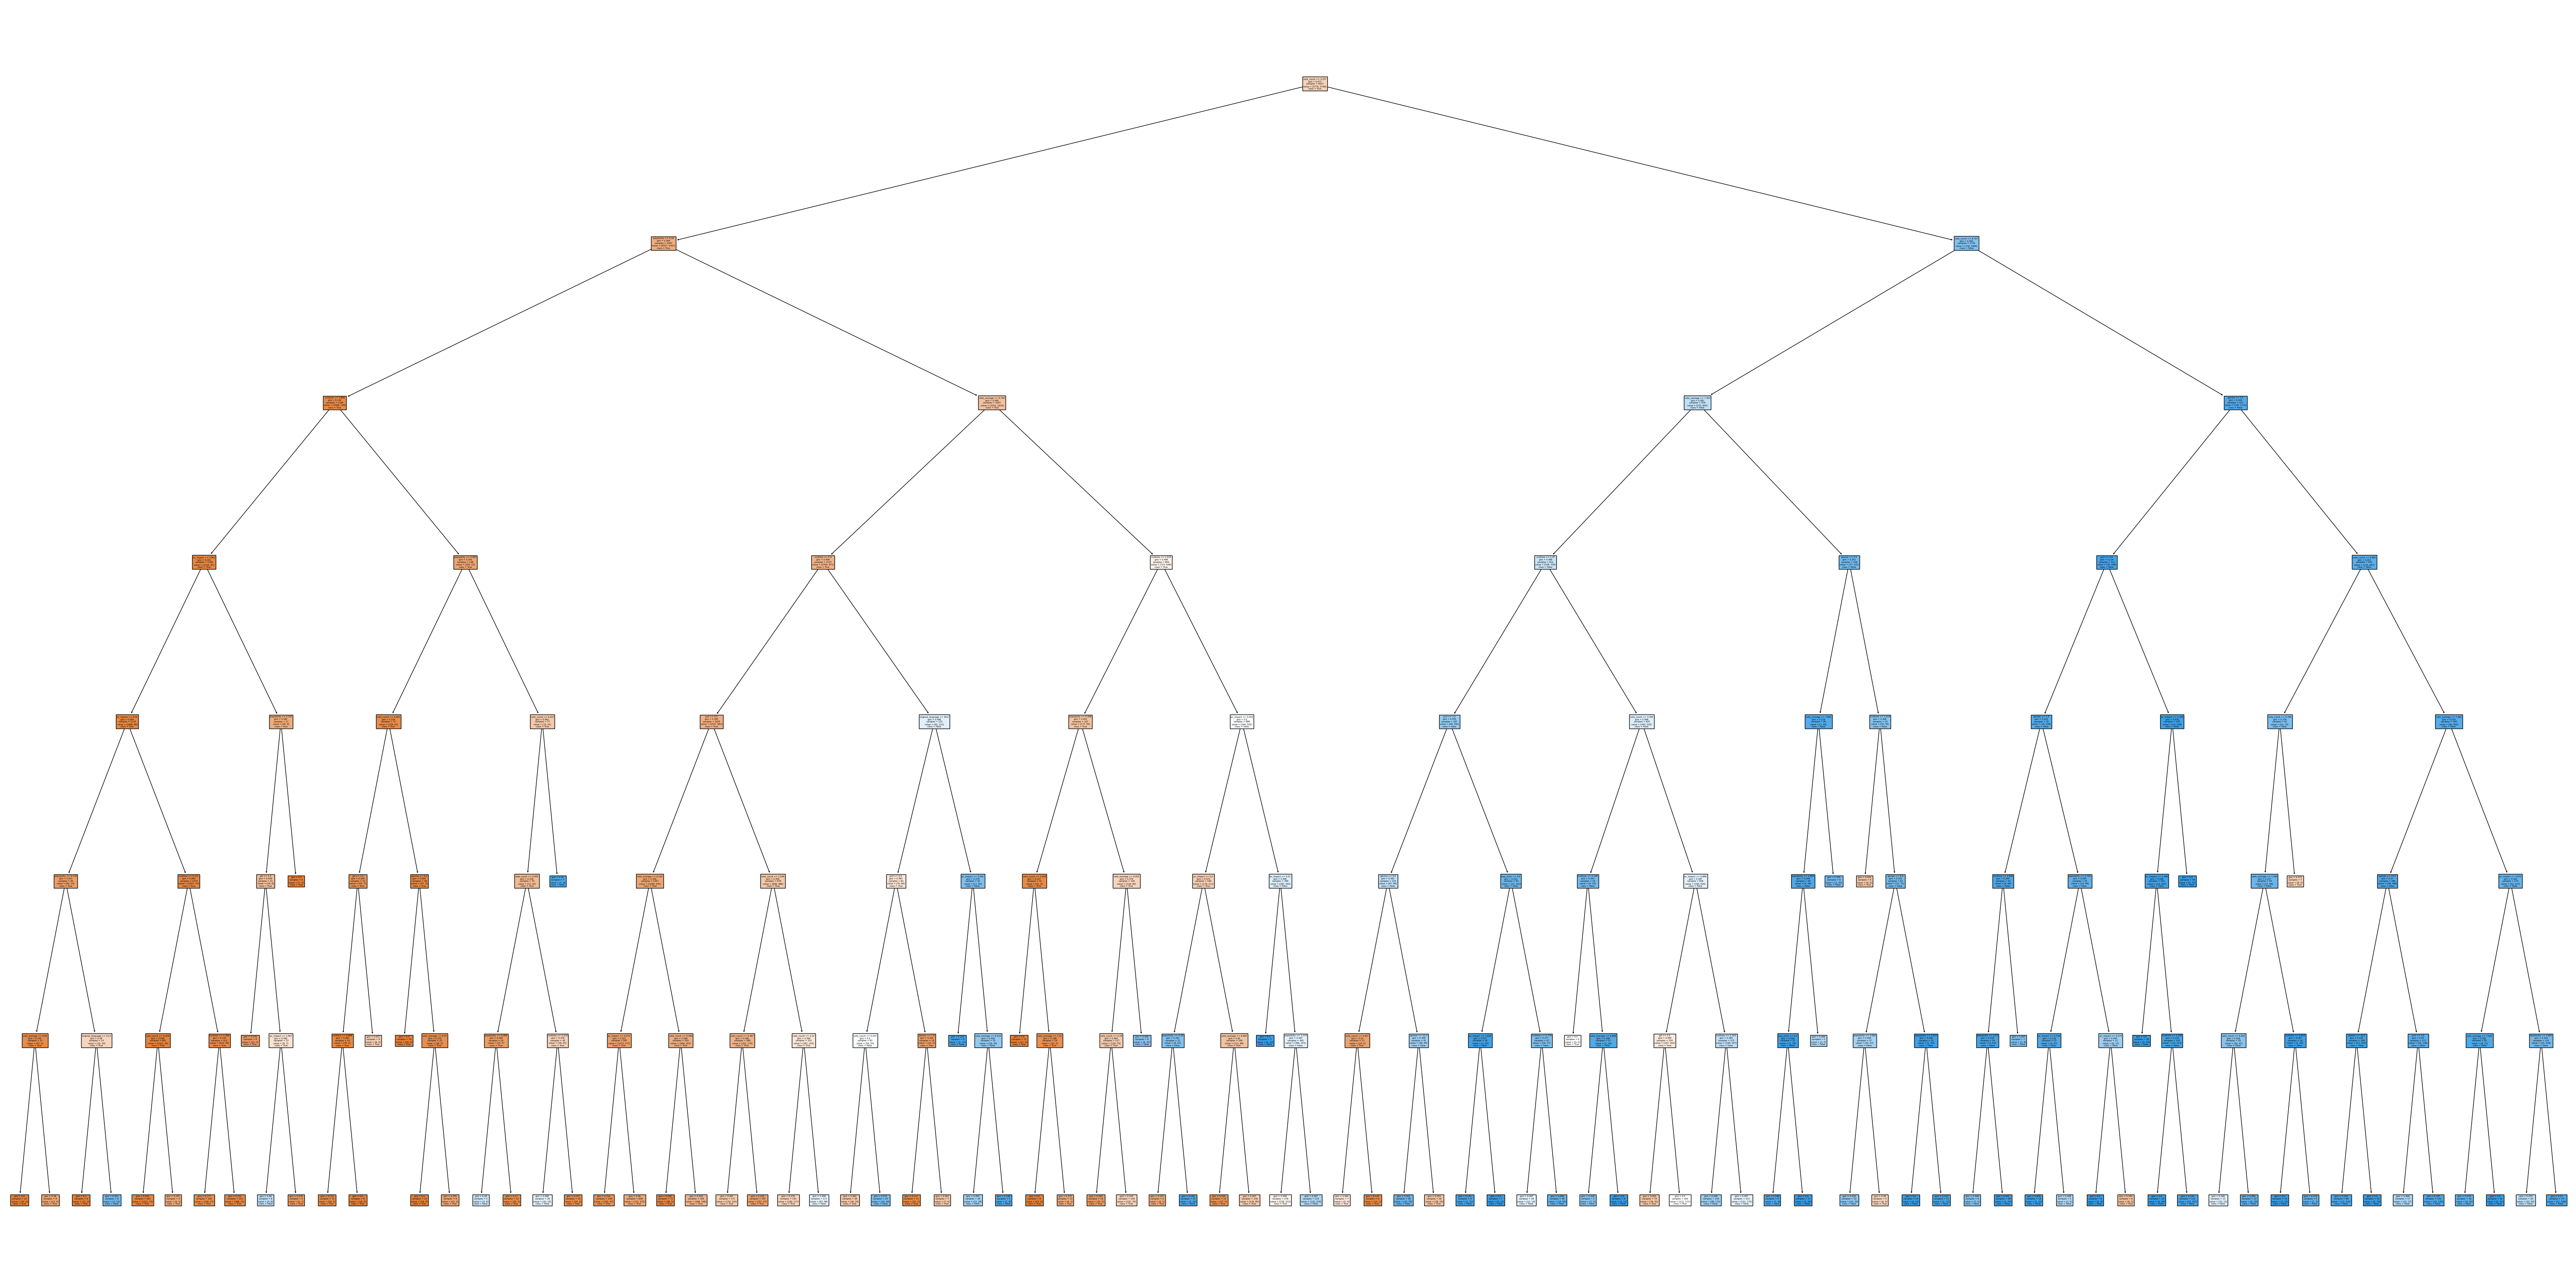

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=["True","False"],filled=True);

In [26]:
rf_best.feature_importances_

array([0.0171426 , 0.02252064, 0.24350568, 0.07046834, 0.09877922,
       0.37160844, 0.10624422, 0.05398371, 0.00407215, 0.01167499])

In [27]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
5,vote_count,0.371608
2,popularity,0.243506
6,pc_impact,0.106244
4,vote_average,0.098779
3,runtime,0.070468
7,pcif,0.053984
1,original_language,0.022521
0,genres,0.017143
9,pop_actor,0.011675
8,gif,0.004072


In [28]:
print('Best Hyperparams: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)

Best Hyperparams:  {'max_depth': 7, 'min_samples_leaf': 5, 'n_estimators': 100}
Best Score:  0.7574390456197658


In [29]:
# Assuming you have a trained random forest model 'model'
y_pred = grid_search.predict(X_test)
acc = grid_search.score(X_test, y_test)
acc

0.7486599166170339

In [31]:
best_model_RF = RandomForestClassifier(**grid_search.best_params_)
best_model_RF.fit(X_train,y_train)
acc = best_model_RF.score(X_test, y_test)
acc

0.7534246575342466

<h2>Decison Trees with Boosting</h2>

In [32]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score

In [33]:
model = xgb.XGBClassifier(objective='binary:logistic',
                         random_state=42)

In [34]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.5],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300]})

In [35]:
best_model_xgb = grid_search.best_estimator_
y_pred = best_model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.78
F1-score: 0.77


<seperator />
<h2> Similarity Based: KNN</h2>

In [36]:
import sklearn

In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [38]:
y_pred = classifier.predict(X_test)
y_test, y_pred

(9979    0
 4333    1
 7910    0
 4395    0
 3016    0
        ..
 2020    0
 2036    1
 3413    0
 4972    1
 7765    0
 Name: success_pot, Length: 1679, dtype: int64,
 array([0, 0, 0, ..., 0, 1, 0]))

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
ac, cm

(0.7534246575342466,
 array([[872, 137],
        [277, 393]]))

<h2>Probability based: Naive Bayes</h2>

In [40]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [41]:
y_pred  =  classifier.predict(X_test)
y_test,y_pred

(9979    0
 4333    1
 7910    0
 4395    0
 3016    0
        ..
 2020    0
 2036    1
 3413    0
 4972    1
 7765    0
 Name: success_pot, Length: 1679, dtype: int64,
 array([0, 1, 0, ..., 0, 1, 1]))

In [42]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
cm, ac

(array([[782, 227],
        [260, 410]]),
 0.7099463966646814)

**<h2>Logistic Regression</h2>**

In [45]:
df_lg = pd.read_csv('movies_prepr_featureExt.csv',sep=r',', skipinitialspace=True)
df_lg.head(20)

,title,genres,original_language,popularity,production_companies,release_year,runtime,vote_average,vote_count,pc_impact,pcif,gif,pop_actor,success_pot
0,Meg 2: The Trench,Action,en,4.5,warner bros,2023,3.037037,7.079,4.417647,1.688612,high,high,True,1
1,The Pope's Exorcist,Horror,en,4.5,screen gems,2023,2.074074,7.433,1.763823,0.644241,low,high,True,1
2,Transformers: Rise of the Beasts,Action,en,4.5,paramount,2023,3.851852,7.340,3.259026,1.516934,high,high,True,1
3,Ant-Man and the Wasp: Quantumania,Action,en,4.5,marvel,2023,3.703704,6.507,9.097441,5.512888,very high,high,True,1
4,Creed III,Drama,en,4.5,metro-goldwyn-mayer,2023,3.037037,7.262,3.653864,1.023453,medium,high,True,1
5,Fast X,Action,en,4.5,universal,2023,4.962963,7.275,10.000000,1.566698,high,high,True,1
6,Insidious: The Red Door,Horror,en,4.5,blumhouse,2023,2.370370,6.750,1.825314,0.452118,low,high,True,1
7,Plane,Action,en,4.5,di bonaventura,2023,2.370370,6.901,2.540552,2.337533,high,high,True,1
8,Spider-Man: Across the Spider-Verse,multiple,en,4.5,columbia,2023,4.814815,8.640,5.450050,1.650344,high,low,True,1
9,Aquaman and the Lost Kingdom,Action,en,4.5,warner bros,2023,3.629630,6.786,2.446697,1.688612,high,high,True,1


In [47]:
df_lg = df_lg.drop(['title','genres','original_language','production_companies','release_year'], axis=1)
df_lg

,popularity,runtime,vote_average,vote_count,pc_impact,pcif,gif,pop_actor,success_pot
0,4.50,3.037037,7.079,4.417647,1.688612,high,high,True,1
1,4.50,2.074074,7.433,1.763823,0.644241,low,high,True,1
2,4.50,3.851852,7.340,3.259026,1.516934,high,high,True,1
3,4.50,3.703704,6.507,9.097441,5.512888,very high,high,True,1
4,4.50,3.037037,7.262,3.653864,1.023453,medium,high,True,1
...,...,...,...,...,...,...,...,...,...
11185,0.06,1.111111,3.350,0.000000,0.312982,low,medium,False,0
11186,0.06,0.000000,3.350,0.000000,0.312982,low,low,False,0
11187,0.06,1.111111,6.500,0.003236,0.312982,low,high,False,0
11188,0.06,1.111111,3.350,0.000000,0.312982,low,high,False,0


In [53]:
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder(handle_unknown='ignore')
# Assuming your categorical features are in columns 0, 1, and 2
X_encoded = oh_encoder.fit_transform(df_lg.iloc[:, 5:8])

# Convert the sparse matrix to a dense NumPy array
X_encoded_array = X_encoded.toarray()

# Create a new DataFrame with the encoded features
df_lg_encoded = pd.DataFrame(X_encoded_array, columns=oh_encoder.get_feature_names_out())
df_lg_encoded = pd.concat([df_lg, df_lg_encoded], axis=1)

df_lg_final = df_lg_encoded.drop(df_lg.columns[5:8], axis=1)
df_lg_final.head(50)

,popularity,runtime,vote_average,vote_count,pc_impact,success_pot,pcif_high,pcif_low,pcif_medium,pcif_very high,gif_high,gif_low,gif_medium,pop_actor_False,pop_actor_True
0,4.5,3.037037,7.079,4.417647,1.688612,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,4.5,2.074074,7.433,1.763823,0.644241,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,4.5,3.851852,7.340,3.259026,1.516934,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4.5,3.703704,6.507,9.097441,5.512888,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,4.5,3.037037,7.262,3.653864,1.023453,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5,4.5,4.962963,7.275,10.000000,1.566698,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,4.5,2.370370,6.750,1.825314,0.452118,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,4.5,2.370370,6.901,2.540552,2.337533,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,4.5,4.814815,8.640,5.450050,1.650344,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,4.5,3.629630,6.786,2.446697,1.688612,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [54]:
# Assuming 'target' is your target column
X_lg = df_lg_final.drop('success_pot', axis=1)
y_lg = df_lg_final['success_pot']

X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X_lg, y_lg, train_size=0.85, random_state=42)
X_train_lg.shape, X_test_lg.shape

((9511, 14), (1679, 14))

In [55]:
#Balancing classes by oversampling using SMOTE
from imblearn.over_sampling import SMOTE
# Check the class distribution in the training set
print("Original training set class distribution:")
print(np.unique(y_train, return_counts=True))

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_lg, y_train_lg)

# Check the class distribution in the resampled training set
print("Resampled training set class distribution:")
print(np.unique(y_train_resampled, return_counts=True))


Original training set class distribution:
(array([0, 1]), array([5764, 3747]))
Resampled training set class distribution:
(array([0, 1]), array([5764, 5764]))


In [58]:
#Applying recursive feature eliminatiom
df_lg_finalVars=df_lg_final.columns.values.tolist()
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=logreg, n_features_to_select=10)
rfe = rfe.fit(X_train_resampled, y_train_resampled.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True  True False  True  True  True False False
  True  True]
[1 1 2 1 1 1 5 1 1 1 4 3 1 1]


In [61]:
y_train_resampled

0        1
1        1
2        0
3        0
4        1
        ..
11523    1
11524    1
11525    1
11526    1
11527    1
Name: success_pot, Length: 11528, dtype: int64

In [63]:
cols = ['popularity','runtime','vote_count','pc_impact','pcif_high','pcif_medium','pcif_very high','gif_high','pop_actor_False','pop_actor_True']
X=X_train_resampled[cols]
y=y_train_resampled


In [64]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.535590
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: success_pot      Pseudo R-squared: 0.227     
Date:               2024-04-08 03:49 AIC:              12368.5582
No. Observations:   11528            BIC:              12442.0835
Df Model:           9                Log-Likelihood:   -6174.3   
Df Residuals:       11518            LL-Null:          -7990.6   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
popularity        0.2596   0.0290   8.9520 0.0000  0.2028  0.3165
runtime           0.2040   0.0127  16.1050 0.0000  0.1792  0.2289


In [65]:
cols = ['popularity','runtime','vote_count','pc_impact','pcif_medium','gif_high','pop_actor_False','pop_actor_True']
X=X_train_resampled[cols]
y=y_train_resampled
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.536070
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: success_pot      Pseudo R-squared: 0.227     
Date:               2024-04-08 03:51 AIC:              12375.6355
No. Observations:   11528            BIC:              12434.4558
Df Model:           7                Log-Likelihood:   -6179.8   
Df Residuals:       11520            LL-Null:          -7990.6   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
popularity        0.2610   0.0290   9.0006 0.0000  0.2041  0.3178
runtime           0.2042   0.0127  16.1309 0.0000  0.1794  0.2290


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train_log, y_train_log)

LogisticRegression()

In [67]:
y_pred_log = logreg.predict(X_test_log)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_log, y_test_log)))

Accuracy of logistic regression classifier on test set: 0.70


In [68]:
confusion_matrix = confusion_matrix(y_test_log, y_pred_log)
print(confusion_matrix)

[[919 249]
 [434 704]]
